# Logistic Regression From Scratch
## Malignancy of Breast Cancer Classification
Based off of logistic regression model created by Martín Pellarolo @martinpella

In [1]:
# Import Libraries
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn import datasets
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load Data
breast_cancer = datasets.load_breast_cancer()

In [3]:
# User Mean Smoothness and Mean Compactness of breast tissue as features
X = breast_cancer.data[:, 5:7]

# Target is either 1 or 0, Malignant or Benign respectively.
y = breast_cancer.target

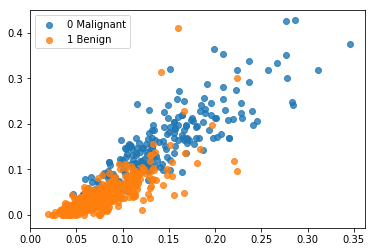

In [4]:
# Plot distribution of malignancy compared to features
ax = sns.regplot(x=X[y == 0][:, 0], y=X[y == 0][:, 1], fit_reg=False, scatter=True, label="0 Malignant")
sns.regplot(x=X[y == 1][:, 0], y=X[y == 1][:, 1], fit_reg=False, scatter=True, label="1 Benign")
ax.legend(loc="best")

In [5]:
# Logistic regression models the probability that each input is part of a particular category
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=True):
        # Define learning rage
        self.lr = lr
        # Define number of iterations
        self.num_iter = num_iter
        # Initialize fit of intercept
        self.fit_intercept = fit_intercept
        # Initialize verbose logs
        self.verbose = verbose
    
    # Adds intercept
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    # Sigmoid function
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    # Cross Entropy loss function
    # Measures the performance of a classification model
    # h = predicted probability of observation
    # y = binary indicator (0 or 1), 1 if label is correct
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    # Train the Model
    def fit(self, X, y):
        # Add intercept if enabled
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # Initialize weights
        self.theta = np.zeros(X.shape[1])
        
        # Update weights through iterations 
        for i in range(self.num_iter):
            # Apply weights to data
            z = np.dot(X, self.theta)
            # Fit to sigmoid curve
            h = self.__sigmoid(z)
            
            # Define gradient descent calculation
            # Derivative of the loss function with respect to each weight
            gradient = np.dot(X.T, (h - y)) / y.size
            
            # Manipulate weights with gradient descent
            self.theta -= self.lr * gradient
            
            # Apply weights to data
            z = np.dot(X, self.theta)
             # Fit to sigmoid curve
            h = self.__sigmoid(z)
            
            # Compute the loss 
            loss = self.__loss(h, y)
            
            # Add loss log
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')
    
    # Calculate probability of predictions
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # Use sigmoid function to get probability that some input x belongs to class 1
        return self.__sigmoid(np.dot(X, self.theta))
    
    # Round prediction to 0 or 1
    def predict(self, X):
        return self.predict_prob(X).round()

In [6]:
# set model to use LogisticRegression Class
model = LogisticRegression(lr=0.1, num_iter=300000)

In [7]:
# Run and time model
%time model.fit(X, y)

loss: 0.6915190775516354 	
loss: 0.4004495005670822 	
loss: 0.3686308625578685 	
loss: 0.35803740751562857 	
loss: 0.3530124621972684 	
loss: 0.3500375845638649 	
loss: 0.3479739443585999 	
loss: 0.3463760484926458 	
loss: 0.3450475495507207 	
loss: 0.3438939781775529 	
loss: 0.34286629119124207 	
loss: 0.3419370025637665 	
loss: 0.3410893727396773 	
loss: 0.3403122637344841 	
loss: 0.33959759864883765 	
loss: 0.3389390699331929 	
loss: 0.33833146513248846 	
loss: 0.33777030496658184 	
loss: 0.3372516421544525 	
loss: 0.3367719441810414 	
loss: 0.336328020558568 	
loss: 0.3359169741271334 	
loss: 0.33553616571563816 	
loss: 0.33518318655497903 	
loss: 0.33485583547654335 	
loss: 0.33455209930639357 	
loss: 0.33427013558345986 	
loss: 0.3340082571037951 	
loss: 0.33376491798749824 	
loss: 0.3335387010666855 	
CPU times: user 37.7 s, sys: 532 ms, total: 38.2 s
Wall time: 40.2 s


In [8]:
# Predict y based off of updated X using weights
preds = model.predict(X)
# Average the predictions that were correct
(preds == y).mean()

0.875219683655536

In [9]:
# Display weights (Intercept, Smoothness, Compactness) 
model.theta

array([  3.39226054,   5.34911351, -38.81129192])

NameError: name 'plt' is not defined

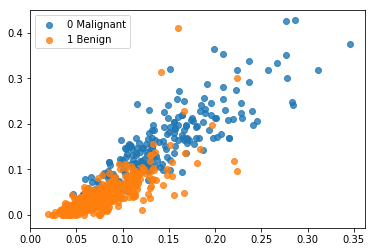

In [10]:
# Plot logistic regression
ax = sns.regplot(x=X[y == 0][:, 0], y=X[y == 0][:, 1], fit_reg=False, scatter=True, label="0 Malignant")
sns.regplot(x=X[y == 1][:, 0], y=X[y == 1][:, 1], fit_reg=False, scatter=True, label="1 Benign")
ax.legend(loc="best")
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');